# Load Date
we load data from Tushare, the detail comment please check `Tushare_Coding.ipynb` in the same root file.

In [2]:
import tushare as ts
import pandas as pd
import numpy as np
from tqdm import tqdm
import stockstats

In [3]:
token = '' # your token
ts.set_token(token)
pro = ts.pro_api()

In [4]:
# got calendar from date range
start_date = '20190101'
end_date = '20210101'
calendar = pro.trade_cal(exchange='SSE', is_open='1', 
                            start_date=start_date, 
                            end_date=end_date, 
                            fields='cal_date')
# check all stocks exist in market today
stocks = pro.query('stock_basic', exchange='', list_status='L', market = '主板') # 主板/创业板/科创板/CDR/北交所

ts_code_list = ','.join(stocks.ts_code.values)
print(calendar.shape, stocks.shape)
stocks.head()

(487, 1) (2186, 7)


,ts_code,symbol,name,area,industry,market,list_date
0,000001.SZ,000001,平安银行,深圳,银行,主板,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,主板,19910129
2,000004.SZ,000004,ST国华,深圳,软件服务,主板,19910114
3,000005.SZ,000005,ST星源,深圳,环境保护,主板,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,主板,19920427


In [5]:
# got stock base valuse
base_universe = pro.bak_daily(start_date='20190102', end_date='20190102', 
                   fields='trade_date, ts_code, name, float_mv, total_mv, pe, turn_over, industry')
base_universe

,ts_code,trade_date,name,turn_over,pe,industry,float_mv,total_mv
0,000592.SZ,20190102,平潭发展,4.30,53.28,林业,56.27,56.79
1,002289.SZ,20190102,宇顺电子,2.45,0.00,元器件,13.90,15.02
2,600463.SH,20190102,空港股份,2.46,0.00,园区开发,23.64,23.64
3,000755.SZ,20190102,山西路桥,1.50,0.00,公路,20.55,20.55
4,300104.SZ,20190102,乐视网,2.56,0.00,互联网,84.21,109.31
...,...,...,...,...,...,...,...,...
3573,601975.SH,20190102,ST长油,0.00,0.00,水运,0.00,0.00
3574,601860.SH,20190102,紫金银行,0.00,0.00,银行,0.00,0.00
3575,601298.SH,20190102,青岛港,0.00,0.00,港口,0.00,0.00
3576,600680.SH,20190102,*ST上普,0.00,0.00,通信设备,0.00,0.00


In [18]:
def _get_daily(ts_code='000001.SZ', start_date='', end_date=''):
    for _ in range(3):
        #try:
            df = pro.daily(ts_code=ts_code, start_date=start_date, end_date=end_date, adj='qfq')
            ## 
            #df = ts.pro_bar(ts_code=ts_code, start_date=start_date, end_date=end_date, adj='qfq',
            #                ma=[10, 120], factors=['tor', 'vr'])
            return df
        #except:
            time.sleep(1)

def get_Daily_All(ts_code_list, calendar):
    '''
    param: DateFrame 
            column:cal_date | index 1,2...n
    :return: DateFrame 
            comlumns: ts_code, trade_date, open, high, low, close, pre_close, change, pct_chg, vol, amount
            index: stock_code(600547.SH	)
    '''
    stocks_daily = pd.DataFrame()
    for date in tqdm(calendar['cal_date'].values):
        stocks_daily = stocks_daily.append(_get_daily(ts_code='', start_date=date, end_date=date))
    return stocks_daily

In [19]:
# load total stock daily date for one year
all_stocks = get_Daily_All(ts_code_list, calendar)
print(all_stocks.shape)
all_stocks

100%|█████████████████████████████████████████| 244/244 [04:13<00:00,  1.04s/it]

(885088, 11)


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000673.SZ,20191231,5.22,5.32,5.05,5.10,5.16,-0.06,-1.1628,376809.74,194304.542
1,000685.SZ,20191231,8.25,8.29,8.21,8.24,8.28,-0.04,-0.4831,46570.29,38367.929
2,000690.SZ,20191231,5.65,5.67,5.62,5.65,5.66,-0.01,-0.1767,52430.97,29576.717
3,000711.SZ,20191231,5.45,5.49,5.37,5.44,5.45,-0.01,-0.1835,85171.58,46170.475
4,000715.SZ,20191231,6.01,6.11,5.95,6.09,6.03,0.06,0.9950,13468.84,8176.773
...,...,...,...,...,...,...,...,...,...,...,...
3549,002790.SZ,20190102,10.54,10.70,10.00,10.03,10.59,-0.56,-5.2880,26740.66,27110.812
3550,300517.SZ,20190102,13.39,13.44,13.18,13.23,13.20,0.03,0.2273,11731.00,15602.715
3551,600936.SH,20190102,3.74,3.78,3.69,3.71,3.74,-0.03,-0.8021,25222.38,9410.100
3552,601606.SH,20190102,11.90,12.10,11.72,11.94,12.06,-0.12,-0.9950,118737.08,141624.306


In [20]:
# save data
all_stocks = all_stocks.drop_duplicates()
all_stocks.to_csv(start_date +'-'+ end_date + '.csv')

# Load Date by File
if we had data in local we can load it directly, but we should run got base stock data code agin

`base_universe = pro.bak_daily(start_date='20190102', end_date='20190102', 
                   fields='trade_date, ts_code, name, float_mv, total_mv, pe, turn_over, industry')`

In [7]:
# load data from csv
table1 = pd.read_csv('20190101-20191231.csv').iloc[:,1:]
# load data from csv
table2 = pd.read_csv('20200101-20210101.csv').iloc[:,1:]
all_stocks = pd.concat([table1,table2]).drop_duplicates()
all_stocks

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000673.SZ,20191231,5.22,5.32,5.05,5.10,5.16,-0.06,-1.1628,376809.74,194304.542
1,000685.SZ,20191231,8.25,8.29,8.21,8.24,8.28,-0.04,-0.4831,46570.29,38367.929
2,000690.SZ,20191231,5.65,5.67,5.62,5.65,5.66,-0.01,-0.1767,52430.97,29576.717
3,000711.SZ,20191231,5.45,5.49,5.37,5.44,5.45,-0.01,-0.1835,85171.58,46170.475
4,000715.SZ,20191231,6.01,6.11,5.95,6.09,6.03,0.06,0.9950,13468.84,8176.773
...,...,...,...,...,...,...,...,...,...,...,...
945957,600010.SH,20200102,1.33,1.34,1.32,1.33,1.32,0.01,0.7576,2042178.23,272334.002
945958,600017.SH,20200102,2.93,2.95,2.92,2.95,2.91,0.04,1.3746,153192.51,45031.267
945959,600052.SH,20200102,4.55,4.62,4.53,4.60,4.50,0.10,2.2222,188679.22,86406.944
945960,600055.SH,20200102,10.38,10.38,10.24,10.28,10.32,-0.04,-0.3876,75047.48,77337.057


# Process Data

In [8]:
universe = all_stocks.sort_index(axis=0, ascending=False)
# convert date to standard string format, easy to filter
universe["date"] = pd.to_datetime(universe["trade_date"], format='%Y%m%d')
universe["date"] = universe.date.apply(lambda x: x.strftime("%Y-%m-%d"))
# drop missing data
universe = universe.dropna()
universe = universe.sort_values(by=["date", "ts_code"]).reset_index(drop=True)
universe['date'] = pd.to_datetime(universe['date'])
universe

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,date
0,000001.SZ,20190102,9.39,9.42,9.16,9.19,9.38,-0.19,-2.0256,539386.32,498695.109,2019-01-02
1,000002.SZ,20190102,23.83,24.09,23.67,23.90,23.82,0.08,0.3359,247010.28,589384.596,2019-01-02
2,000004.SZ,20190102,16.05,16.24,16.01,16.06,16.03,0.03,0.1871,1424.00,2290.041,2019-01-02
3,000005.SZ,20190102,2.69,2.70,2.66,2.67,2.68,-0.01,-0.3731,29096.00,7788.443,2019-01-02
4,000006.SZ,20190102,5.18,5.25,5.10,5.15,5.18,-0.03,-0.5792,63229.64,32733.636,2019-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...
1831045,688699.SH,20201231,54.00,56.33,53.70,55.17,54.20,0.97,1.7897,19365.10,107364.703,2020-12-31
1831046,688777.SH,20201231,99.58,102.53,98.65,100.20,99.98,0.22,0.2200,21646.77,217684.620,2020-12-31
1831047,688788.SH,20201231,134.49,138.50,131.27,133.30,133.00,0.30,0.2256,13474.66,180990.025,2020-12-31
1831048,688981.SH,20201231,57.00,58.57,56.42,57.75,56.47,1.28,2.2667,471429.07,2721084.309,2020-12-31


In [9]:
# pick up float market cap bettwen 2 billion 50 billion from date=20190101
# maybe I should remove the ST stock or get top 500 of total_mv stocks
stocks = base_universe.loc[(base_universe.total_mv >= 20) & (base_universe.total_mv<=50)]
df = universe[np.in1d(universe.ts_code, stocks.ts_code)]

In [10]:
# add industry to each stock
df_new = pd.DataFrame()
for ts_code in tqdm(df.ts_code.unique(), desc='ticker/tickers'):
    tmp = df.loc[df.ts_code == ts_code]
    tmp['industry'] = stocks.loc[stocks.ts_code == ts_code]['industry'].values[0]
    df_new = df_new.append(tmp)

df_new

ticker/tickers:   0%|                                  | 0/1640 [00:00<?, ?it/s]/Users/jiaruiming/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
ticker/tickers: 100%|███████████████████████| 1640/1640 [02:22<00:00, 11.50it/s]


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,date,industry
3,000005.SZ,20190102,2.69,2.70,2.66,2.67,2.68,-0.01,-0.3731,29096.00,7788.443,2019-01-02,房产服务
3557,000005.SZ,20190103,2.68,2.72,2.65,2.68,2.67,0.01,0.3745,26468.00,7116.654,2019-01-03,房产服务
7112,000005.SZ,20190104,2.67,2.75,2.66,2.75,2.68,0.07,2.6119,39036.20,10632.023,2019-01-04,房产服务
10667,000005.SZ,20190107,2.78,2.90,2.76,2.84,2.75,0.09,3.2727,120080.43,34202.714,2019-01-07,房产服务
14221,000005.SZ,20190108,2.84,2.86,2.82,2.83,2.84,-0.01,-0.3521,37048.77,10513.182,2019-01-08,房产服务
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812936,600145.SH,20201225,1.34,1.34,1.29,1.31,1.35,-0.04,-2.9630,57765.36,7580.320,2020-12-25,陶瓷
1817042,600145.SH,20201228,1.32,1.34,1.28,1.30,1.31,-0.01,-0.7634,37762.63,4919.264,2020-12-28,陶瓷
1821152,600145.SH,20201229,1.31,1.34,1.29,1.29,1.30,-0.01,-0.7692,34974.13,4567.036,2020-12-29,陶瓷
1825264,600145.SH,20201230,1.30,1.30,1.24,1.29,1.29,0.00,0.0000,48672.64,6175.462,2020-12-30,陶瓷


# Create Factor 
we just simple create factor by pct_chg_60_ema and pct_chg_60_sma order by industry as a factor.

note that as we order by industry means we shoule rank or zscore the factor value by industry(factor value minus mean of factor value in industry)

In [11]:
def add_technical_indicator(universe, tech_indeicator_list, unique_ticker):
    """
    calculate technical indicators
    use stockstats package to add technical inidactors
    :param ticker: (df) pandas dataframe
    :param tech_indeicator_list list
    :return: (df) pandas dataframe
    """
    
    df = universe.sort_values(by=["ts_code", "date"])
    stock = stockstats.StockDataFrame.retype(df.copy())
    
    for indicator in tech_indicator_list:
        indicator_df = pd.DataFrame()
        for i in tqdm(range(len(unique_ticker)), desc=indicator):
            try:
                temp_indicator = stock[stock.ts_code == unique_ticker[i]][indicator]
                temp_indicator = pd.DataFrame(temp_indicator)
                temp_indicator["ts_code"] = unique_ticker[i]
                temp_indicator["date"] = df[df.ts_code == unique_ticker[i]]["date"].to_list()
                indicator_df = indicator_df.append(temp_indicator, ignore_index=True)
            except Exception as e:
                print(e)
        df = df.merge(
            indicator_df[["ts_code", "date", indicator]], on=["ts_code", "date"], how="left")
        
    df = df.sort_values(by=["date", "ts_code"])
    return df

In [12]:
# add indicators as raw factors
tech_indicator_list = ['pct_chg_60_sma','pct_chg_60_ema']
df = add_technical_indicator(df_new, tech_indicator_list, df_new.ts_code.unique())

pct_chg_60_ema: 100%|███████████████████████| 1640/1640 [03:07<00:00,  8.75it/s]


In [13]:
# calculate facors and turn to zscore
from scipy.stats import zscore

df_group = df.groupby('industry')
factor_df = pd.DataFrame()
for df_tuple in tqdm(df_group, desc='industrt/industries'):
    tmp = df_tuple[1]
    tmp = tmp.set_index(['date','ts_code'])[['pct_chg_60_sma', 'pct_chg_60_ema']]
    #tmp = (tmp - tmp.mean(axis=0))/tmp.std(axis=0)
    tmp = tmp.apply(zscore)
    factor_df = factor_df.append(tmp)
factor_df = factor_df.sort_values(by=["date", "ts_code"])
factor_df

industrt/industries: 100%|████████████████████| 102/102 [00:07<00:00, 14.41it/s]


pct_chg_60_sma  pct_chg_60_ema
date       ts_code                                  
2019-01-02 000005.SZ       -1.308294       -1.288139
           000007.SZ        2.059384        1.956119
           000010.SZ        1.502682        1.458600
           000017.SZ        6.743458        6.421203
           000018.SZ        1.036507        0.983762
...                              ...             ...
2020-12-31 603988.SH       -0.667580       -0.744844
           603990.SH       -1.421180       -1.979708
           603996.SH       -2.044396       -2.388042
           603997.SH       -0.155228       -0.803295
           603999.SH       -0.404477       -0.682096

[792349 rows x 2 columns]

# Process Price Date
In order to use alphalens, we have to got pairs of factor and price. Note that avoid use the future of long period price. In this case, we pike open price of next time.

In [14]:
prices_df = df_new.pivot(index='date', columns='ts_code', values='open')
#prices_df.index = pd.to_datetime(prices_df.index)
prices_df = prices_df.shift(-1).iloc[:-1,:].fillna(0)
prices_df

ts_code,000005.SZ,000007.SZ,000010.SZ,000017.SZ,000018.SZ,000020.SZ,000026.SZ,000032.SZ,000037.SZ,000043.SZ,...,603977.SH,603978.SH,603979.SH,603985.SH,603987.SH,603988.SH,603990.SH,603996.SH,603997.SH,603999.SH
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2.68,8.07,3.29,4.49,2.16,10.31,7.30,7.20,4.78,7.41,...,6.87,19.04,7.35,20.40,6.44,9.82,32.47,7.56,7.70,4.79
2019-01-03,2.67,7.65,3.26,4.43,2.10,10.18,7.29,7.12,4.55,7.46,...,6.99,18.72,7.30,19.92,6.38,9.63,31.79,7.45,7.89,4.70
2019-01-04,2.78,8.11,3.33,4.74,2.23,10.81,7.55,7.40,4.83,7.71,...,7.10,19.82,7.55,20.60,6.73,9.96,31.89,7.80,7.86,5.00
2019-01-07,2.84,8.10,3.40,4.68,2.32,10.89,7.74,7.59,5.04,7.93,...,7.16,19.81,7.55,21.40,6.63,10.13,32.88,7.85,7.80,5.06
2019-01-08,2.84,7.86,3.38,4.73,2.31,10.89,7.75,7.61,5.46,7.90,...,7.18,19.91,7.63,20.87,6.90,10.40,32.25,8.26,7.85,5.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2.50,8.62,3.69,2.42,0.00,9.21,11.06,19.10,10.98,0.00,...,7.04,16.99,11.74,32.99,16.18,12.22,32.59,1.90,7.74,5.39
2020-12-25,2.51,8.54,3.58,2.43,0.00,9.59,10.87,19.21,11.70,0.00,...,7.00,17.50,11.88,34.31,16.36,12.43,32.59,1.84,8.10,5.44
2020-12-28,2.50,8.54,3.60,2.45,0.00,9.80,10.65,18.60,11.28,0.00,...,6.92,17.20,11.69,34.49,15.43,12.08,31.00,1.86,7.86,5.40


# Prepare data for use in alphalens

In [15]:
import alphalens

factor_results = {}
for col in factor_df.columns:
    data = alphalens.utils.get_clean_factor_and_forward_returns(factor_df[col], prices_df, quantiles=5, periods=(1,5,20))
    data.replace([np.inf, -np.inf], 0, inplace=True)
    factor_results[col] = data

Dropped 4.3% entries from factor data: 4.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 4.3% entries from factor data: 4.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [16]:
factor_results['pct_chg_60_sma'] = factor_results['pct_chg_60_sma'].fillna(0)
factor_results['pct_chg_60_ema'] = factor_results['pct_chg_60_ema'].fillna(0)
factor_results['pct_chg_60_sma']

1D        5D       20D    factor  factor_quantile
date       asset                                                             
2019-01-02 000005.SZ -0.003731  0.059701  0.059701 -1.308294                2
           000007.SZ -0.052045 -0.003717 -0.395291  2.059384                4
           000010.SZ -0.009119  0.021277 -0.130699  1.502682                4
           000017.SZ -0.013363  0.066815 -0.069042  6.743458                5
           000018.SZ -0.027778  0.069444 -0.074074  1.036507                4
...                        ...       ...       ...       ...              ...
2020-12-02 603988.SH -0.000729 -0.069971 -0.112245 -0.888865                1
           603990.SH -0.014270 -0.052973 -0.329730 -0.208260                4
           603996.SH  0.003484 -0.055749 -0.369338  0.360648                5
           603997.SH -0.031674 -0.076923 -0.144796  0.256813                5
           603999.SH -0.011327 -0.032362 -0.113269 -0.568868                3

[758100 rows x 5 columns]

# Calculate Factor Return
Alphalens has a function that calculates the factor returns, called alphalens.performance.factor_returns.  The [documentation is here](https://quantopian.github.io/alphalens/alphalens.html?highlight=factor_returns#alphalens.performance.factor_returns).  

To standardize the factor so that it is dollar neutral with a leverage ratio of one(set demeaned=True)

In [17]:
factor_names = factor_df.columns
ls_factor_return = []

for i, factor_name in enumerate(factor_names):
    factor_return = alphalens.performance.factor_returns(factor_results[factor_name], demeaned=True)
    #factor_return.columns = [factor_name]
    factor_return = factor_return.fillna(0)
    ls_factor_return.append(factor_return)
ls_factor_return[0]

,1D,5D,20D
date,,,
2019-01-02,-0.005683,0.001475,-0.018369
2019-01-03,0.001267,-0.000448,-0.015367
2019-01-04,0.003998,-0.004015,-0.015622
2019-01-07,-0.006876,-0.008139,-0.025547
2019-01-08,-0.003184,-0.008486,-0.022943
...,...,...,...
2020-11-26,-0.002540,-0.017984,0.015999
2020-11-27,-0.002086,-0.014793,0.024223
2020-11-30,-0.001083,-0.012042,0.028552


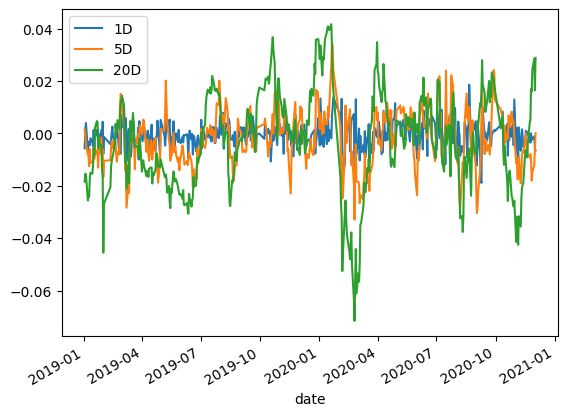

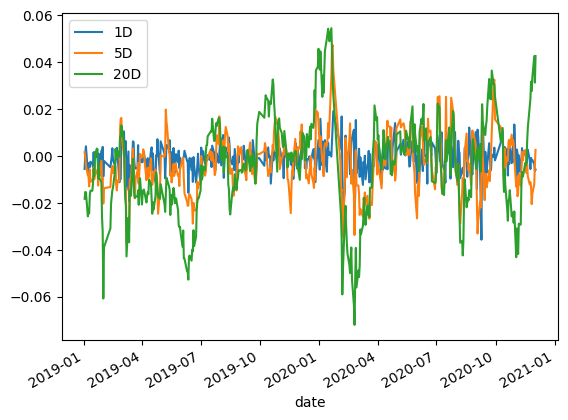

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

ls_factor_return[0].plot()
ls_factor_return[1].plot();

<AxesSubplot:title={'center':'Portfolio Cumulative Return (1D Fwd Period)'}, ylabel='Cumulative Returns'>

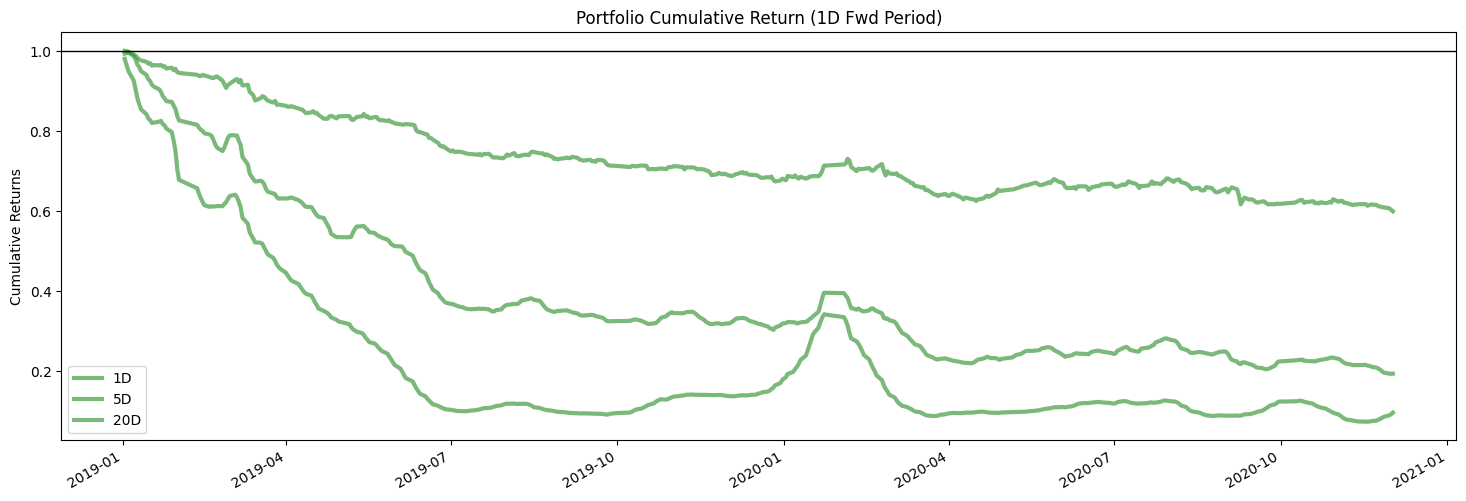

In [19]:
bd = pd.tseries.offsets.BusinessDay(n = 1)
alphalens.plotting.plot_cumulative_returns(ls_factor_return[1], period='1D', freq=bd)

# Sharpe ratio
Generally, a sharpe ratio of 1 or higher indicates a better factor than one with a lower Sharpe ratio.  In other words, the returns that would have been accrued by a portfolio that was weighted according to the alpha factor would have had an annualized return that is greater or equal to its annualized volatility

Recall that the annualize the sharpe ratio (from daily to annual), multiply by $ \sqrt[2]{252} $

In [20]:
def sharpe_ratio(df, frequency="daily"):

    if frequency == "daily":
        # TODO: daily to annual conversion
        annualization_factor = np.sqrt(252)
    elif frequency == "monthly":
        #TODO: monthly to annual conversion
        annualization_factor = np.sqrt(12) 
    else:
        # TODO: no conversion
        annualization_factor = 1
        
    #TODO: calculate the sharpe ratio and store it in a dataframe.
    # name the column 'Sharpe Ratio'.  
    # round the numbers to 2 decimal places
    df_sharpe = pd.DataFrame(annualization_factor * (df.mean() / df.std()), columns = ['Sharpe Ratio']).round(2)
    
    return df_sharpe

In [21]:
print(sharpe_ratio(ls_factor_return[0]))
print(sharpe_ratio(ls_factor_return[1]))

     Sharpe Ratio
1D          -2.08
5D          -3.49
20D         -2.65
     Sharpe Ratio
1D          -2.74
5D          -4.63
20D         -3.56


# Package Analysis
`alphalens.tears.create_full_tear_sheet()` function can be used to display most of analysis of results.
Let's see one of the factors analysis report

If some error like :AttributeError: 'Index' object has no attribute 'get_values'
just change `get_values()` to `to_numpy()`

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-24.090958,0.691232,-0.908927,0.825727,151805,20.024403
2,-3.470801,1.605275,-0.355827,0.491717,151531,19.988260
3,-1.274922,2.456416,-0.071916,0.505068,151528,19.987864
4,-0.842214,3.779413,0.266819,0.562911,151531,19.988260
5,-0.539134,27.011610,1.163797,1.080963,151705,20.011212


Returns Analysis


,1D,5D,20D
Ann. alpha,-0.158,-0.111,-0.039
beta,0.056,0.031,-0.002
Mean Period Wise Return Top Quantile (bps),-13.413,-9.421,-5.391
Mean Period Wise Return Bottom Quantile (bps),2.626,1.474,-0.579
Mean Period Wise Spread (bps),-16.039,-10.958,-4.899


<Figure size 640x480 with 0 Axes>

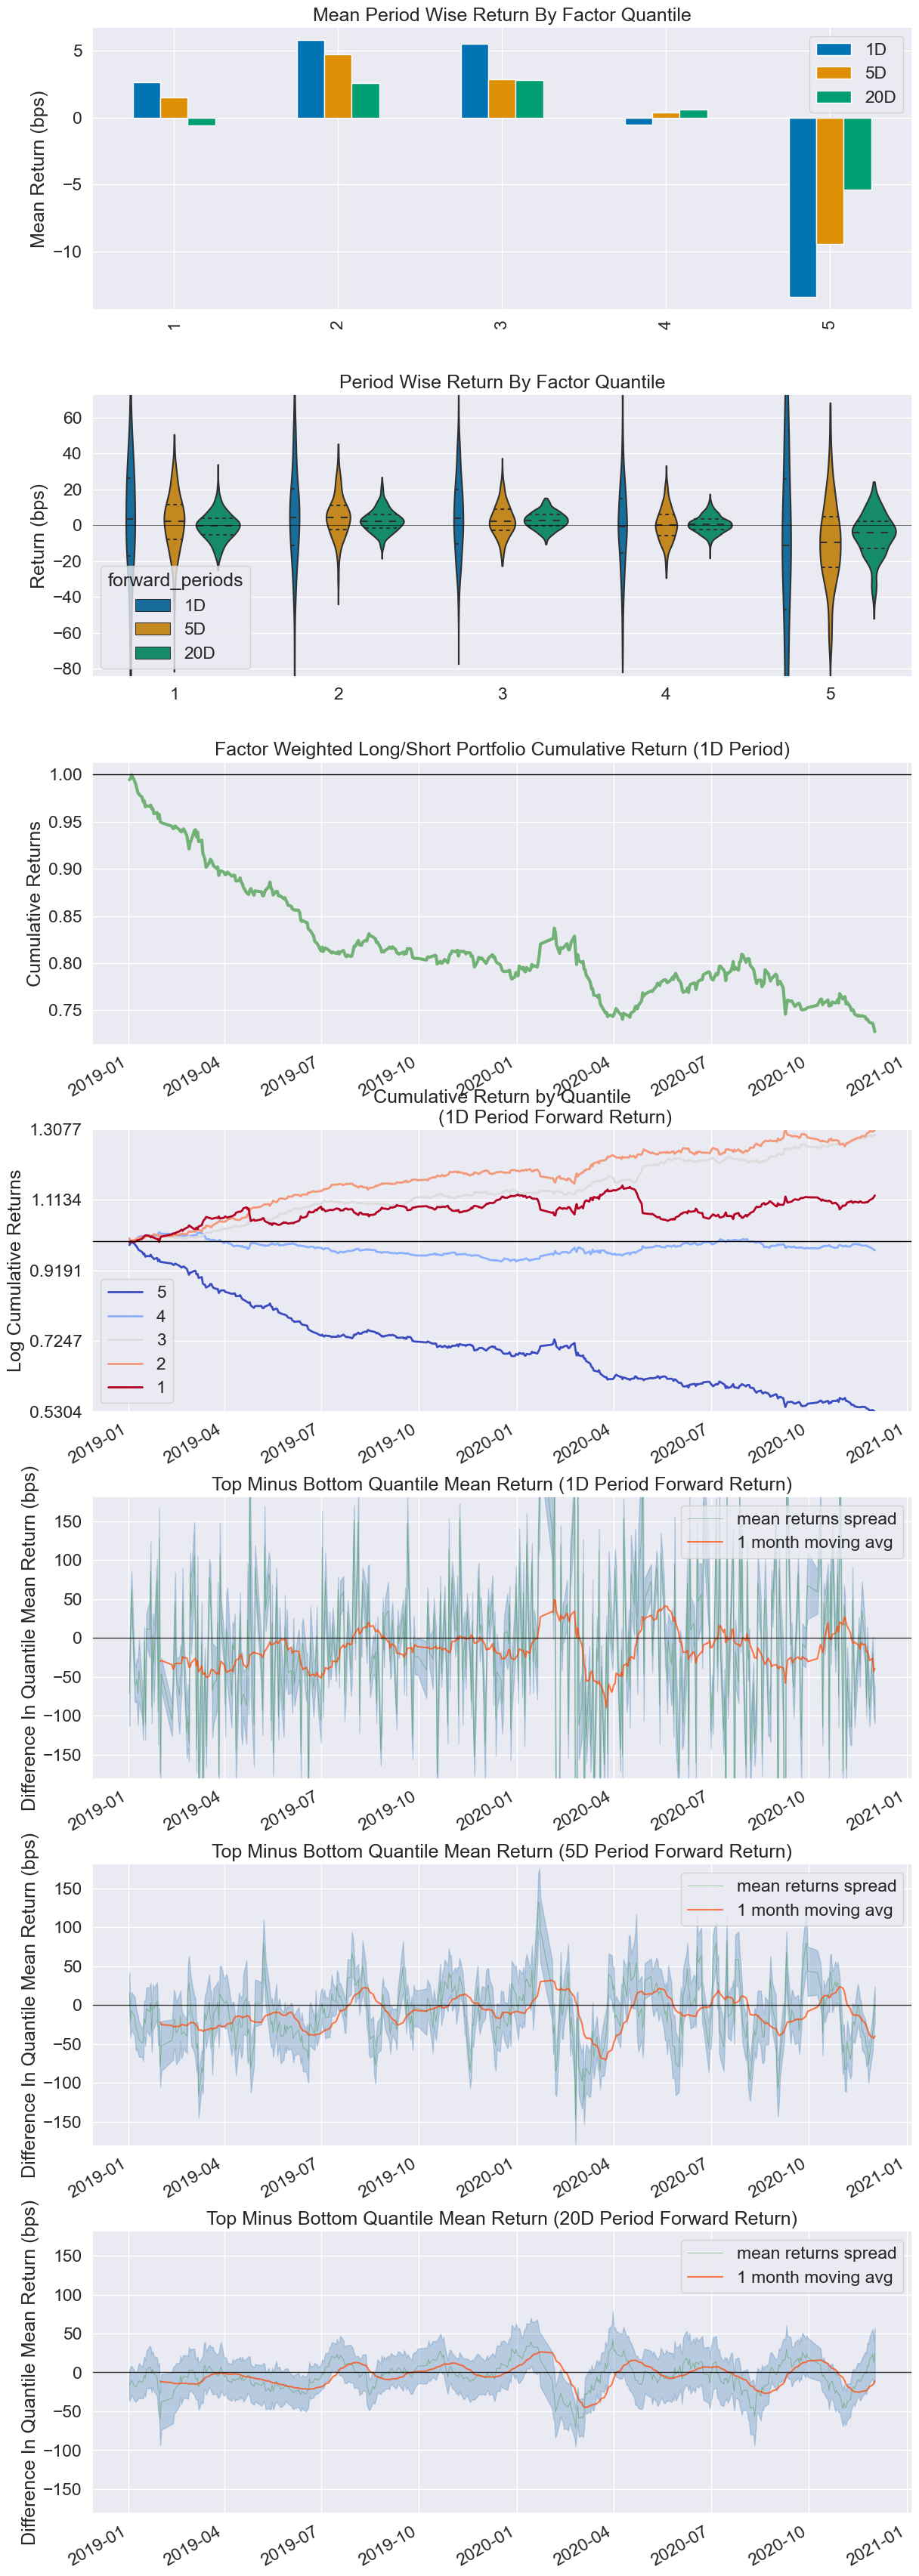

Information Analysis


,1D,5D,20D
IC Mean,-0.040,-0.065,-0.074
IC Std.,0.108,0.111,0.114
Risk-Adjusted IC,-0.372,-0.583,-0.648
t-stat(IC),-8.024,-12.594,-13.990
p-value(IC),0.000,0.000,0.000
IC Skew,0.038,0.039,-0.146
IC Kurtosis,0.441,-0.105,0.036


/Users/jiaruiming/anaconda/envs/py37/lib/python3.7/site-packages/alphalens/plotting.py:276: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ic.replace(np.nan, 0.), norm_hist=True, ax=a)
/Users/jiaruiming/anaconda/envs/py37/lib/python3.7/site-packages/alphalens/plotting.py:276: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

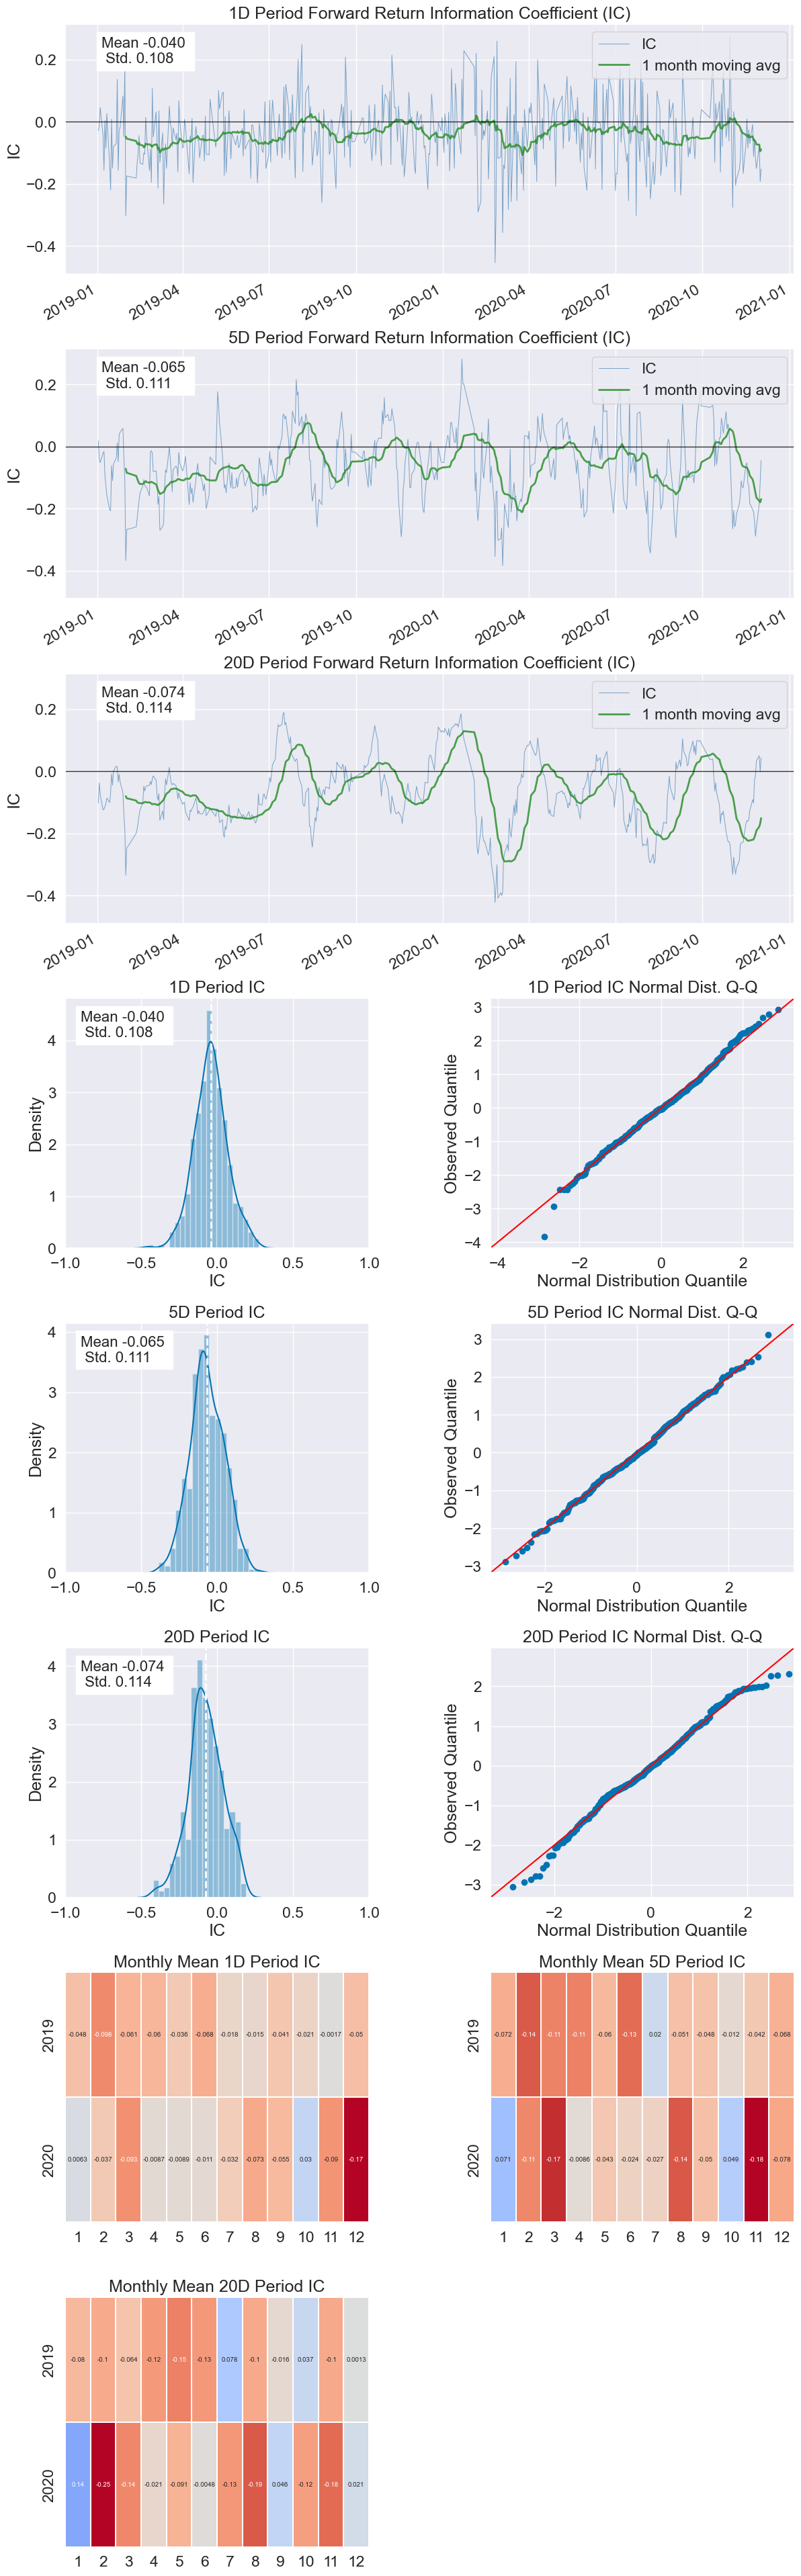

/Users/jiaruiming/anaconda/envs/py37/lib/python3.7/site-packages/alphalens/utils.py:911: UserWarning: Skipping return periods that aren't exact multiples of days.
  "Skipping return periods that aren't exact multiples"


Turnover Analysis


,1D,5D,20D
Quantile 1 Mean Turnover,0.123,0.271,0.497
Quantile 2 Mean Turnover,0.272,0.493,0.676
Quantile 3 Mean Turnover,0.294,0.519,0.701
Quantile 4 Mean Turnover,0.240,0.463,0.678
Quantile 5 Mean Turnover,0.097,0.221,0.433


,1D,5D,20D
Mean Factor Rank Autocorrelation,0.97,0.867,0.592


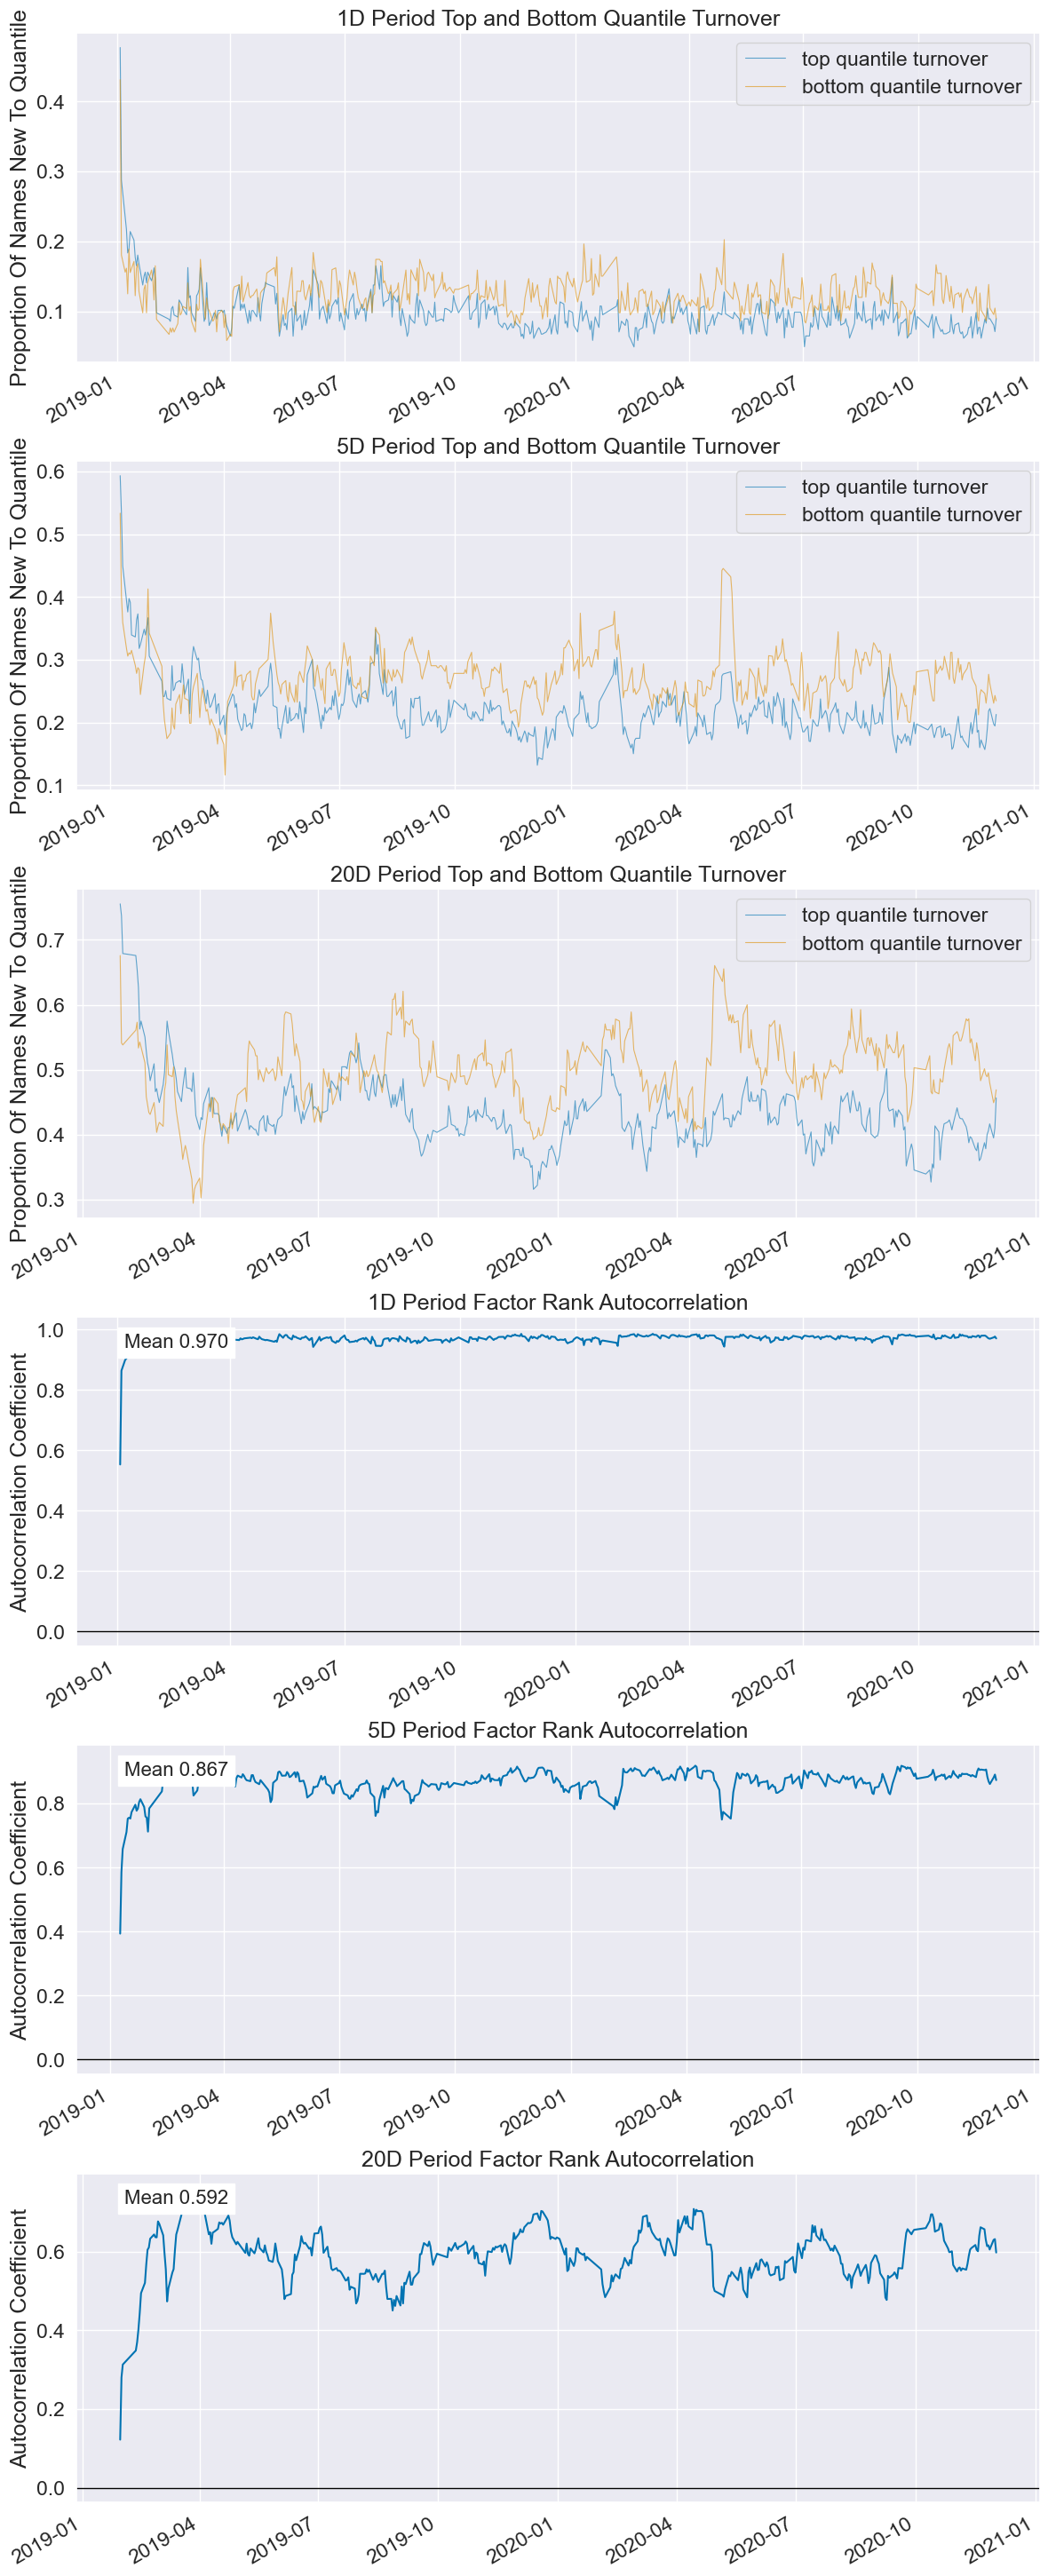

In [24]:
alphalens.tears.create_full_tear_sheet(factor_results['pct_chg_60_sma'])